### ASSIGNMENT 1

In [24]:
! pip install rarfile pandas



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import rarfile
file_path = r"C:\Users\ekyus\Downloads\pd_speech_features.rar"
target_path = r"C:\Users\ekyus\Downloads\pd_speech_features.csv"
def extract_rar(file_path, target_path):
    with rarfile.RarFile(file_path) as rf:
        rf.extractall(target_path)


In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [27]:
data = pd.read_csv(r"C:\Users\ekyus\Downloads\pd_speech_features.csv", header=1)
data.describe

<bound method NDFrame.describe of       id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
0      0       1  0.85247  0.71826  0.57227        240               239  \
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitt

In [28]:
# Calculate the correlation of each feature with the target variable
correlations = data.corr()['class'].sort_values(ascending=False)
#  highest absolute correlation
top_correlations = correlations.drop('class').apply(abs).nlargest(10)

# Select the top 5 features
top_features = top_correlations.index[:5]

# Print the top 5 features and their correlations with the target variable
top_features_correlations = correlations[top_features]
print(top_features_correlations)


mean_MFCC_2nd_coef      0.398695
tqwt_minValue_dec_12    0.395740
tqwt_stdValue_dec_12   -0.393029
tqwt_maxValue_dec_12   -0.391288
tqwt_stdValue_dec_11   -0.391081
Name: class, dtype: float64


## ALL features have the same correlation

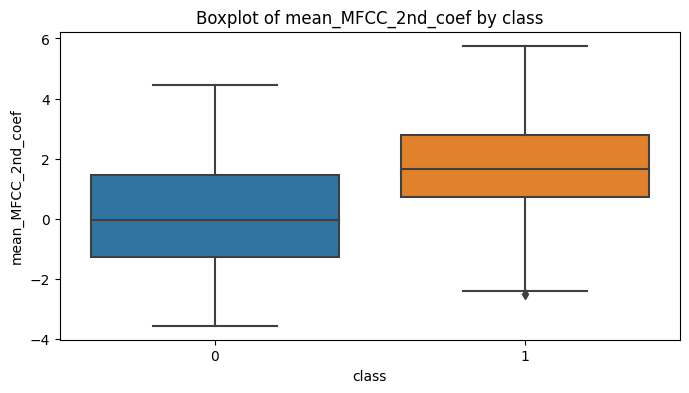

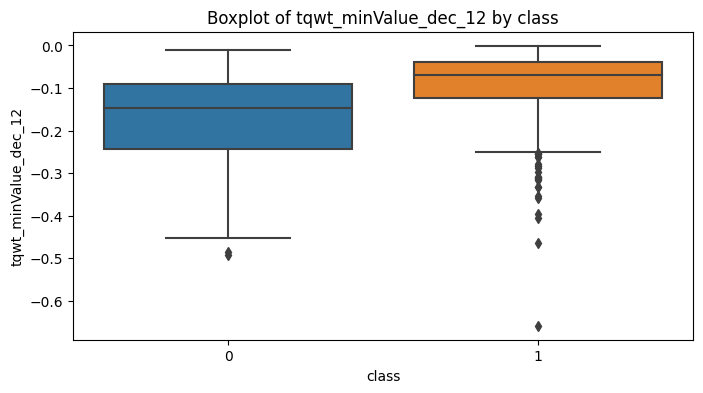

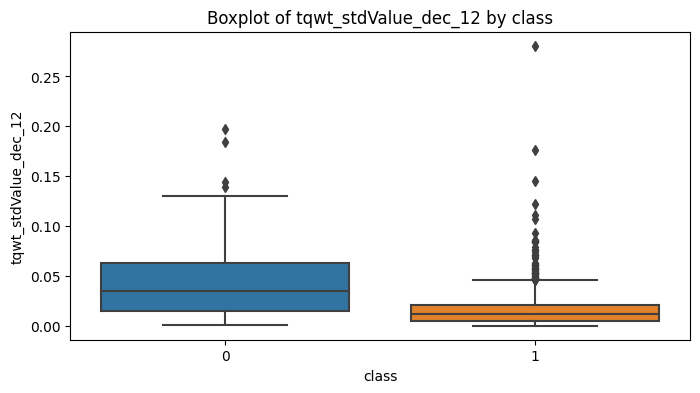

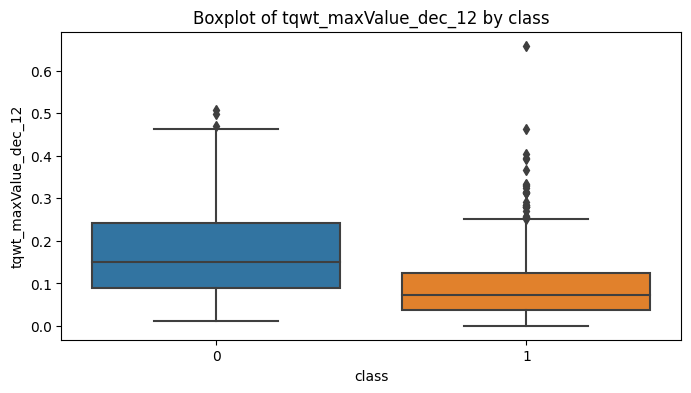

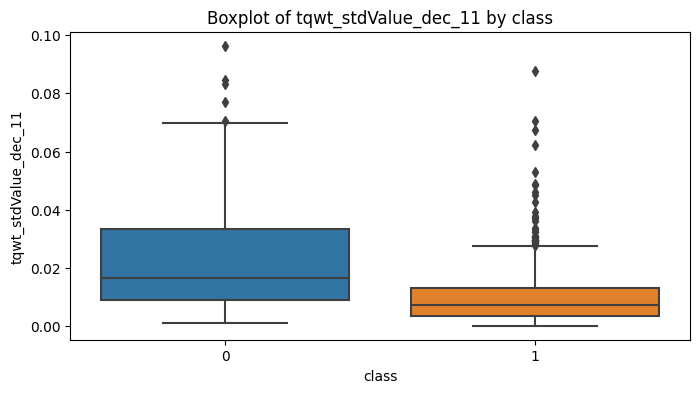

In [29]:
# Create boxplots for each of the top 5 features
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=feature, data=data)
    plt.title(f"Boxplot of {feature} by class")
    plt.show()

AS WE SEE THERE ARE A FEW OUTLIERS, but since we are dealing with a highly imporbale case of parkinson's disease we would keep the outliers since they might be valuable

In [30]:
# Separate the features from the target variable
X = data.drop(columns='class')
y = data['class']
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the standard scaler
scaler = StandardScaler()
# Fit on the training set
scaler.fit(X_train)

StandardScaler()

In [31]:
# Apply the scaler to the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize the logistic regression model
model = LogisticRegression(random_state=45)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Use the model to make predictions on the test set
y_pred = model.predict(X_test_scaled)

c:\Users\ekyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
accuracy, precision, recall, f1

(0.868421052631579, 0.8916666666666667, 0.9385964912280702, 0.9145299145299146)

In [36]:
# as we see we get a pretty good, precision and recall too so this model works good

In [35]:
## SINCE WE ARE USING LOGISTIC REGRESSION THE EFFECT OF OUTLIERS WOULD BE NEGATED